In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# import
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, ReLU, BatchNormalization
import numpy as np
import os
import sys
from six.moves import cPickle
import matplotlib.pyplot as plt

In [ ]:
# load data


batch_size = 32
num_classes = 21
epochs = 70
IMG_HEIGHT, IMG_WIDTH = 150, 150

PATH = '/content/drive/My Drive/Colab Notebooks/data'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
# 데이터 전처리(150x150)

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=.2,
                                           height_shift_range=.2,
                                          horizontal_flip=True,
                                          zoom_range=.2)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 16824 images belonging to 21 classes.
Found 4189 images belonging to 21 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

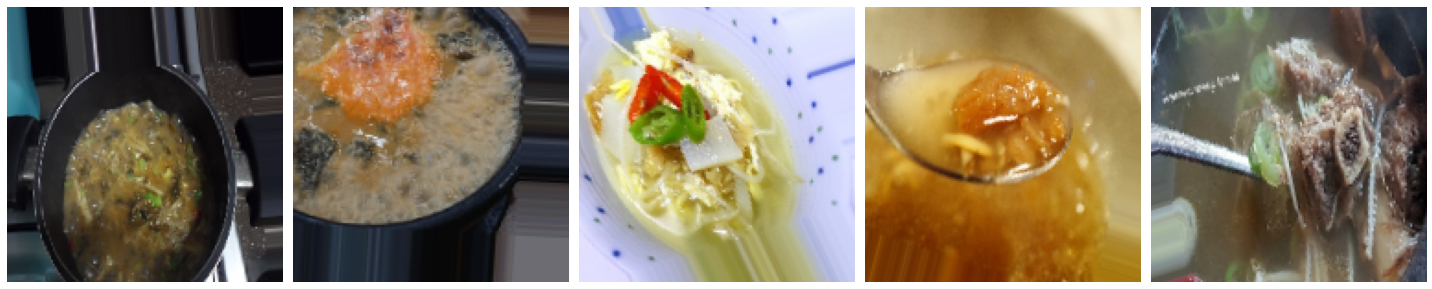

In [ ]:
# train data 확인

sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(21, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)       

In [ ]:
# compile
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
# 모델 생성

steps_per_epoch = int(16824/batch_size)

history = model.fit(
    train_data_gen,
    batch_size = batch_size,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch,
    workers=4,
    validation_data=val_data_gen
)

Epoch 1/70
 77/525 [===>..........................] - ETA: 2:29 - loss: 3.7448 - accuracy: 0.0694

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


280/525 [===============>..............] - ETA: 1:24 - loss: 3.1228 - accuracy: 0.1074

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


525/525 [==============================] - 217s 413ms/step - loss: 2.9103 - accuracy: 0.1370 - val_loss: 3.0838 - val_accuracy: 0.1048
Epoch 2/70
525/525 [==============================] - 219s 416ms/step - loss: 2.5115 - accuracy: 0.2116 - val_loss: 2.3662 - val_accuracy: 0.2416
Epoch 3/70
525/525 [==============================] - 219s 417ms/step - loss: 2.4095 - accuracy: 0.2383 - val_loss: 2.3313 - val_accuracy: 0.2664
Epoch 4/70
525/525 [==============================] - 220s 419ms/step - loss: 2.3431 - accuracy: 0.2564 - val_loss: 2.4880 - val_accuracy: 0.2344
Epoch 5/70
525/525 [==============================] - 222s 423ms/step - loss: 2.2751 - accuracy: 0.2747 - val_loss: 2.8808 - val_accuracy: 0.2022
Epoch 6/70
525/525 [==============================] - 221s 420ms/step - loss: 2.2117 - accuracy: 0.2952 - val_loss: 2.7101 - val_accuracy: 0.2211
Epoch 7/70
525/525 [==============================] - 221s 421ms/step - loss: 2.1782 - accuracy: 0.3079 - val_loss: 3.1351 - val_accura

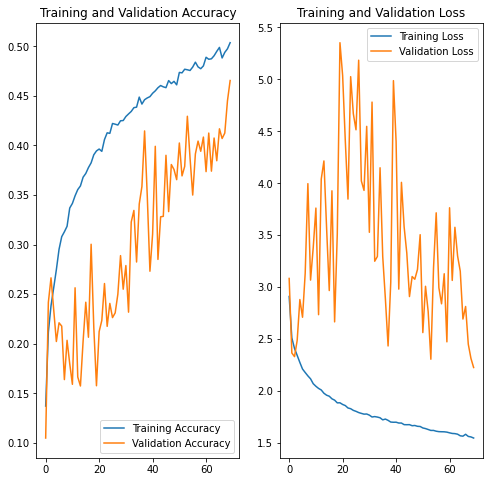

In [ ]:
# accuracy와 loss 그래프

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()